# Notebook Imports

In [5]:
from os import walk
from os.path import join

import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from bs4 import BeautifulSoup
from wordcloud import WordCloud
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split

%matplotlib inline

ModuleNotFoundError: No module named 'wordcloud'

# Constants

In [ ]:
EXAMPLE_FILE = 'SpamData/01_Processing/practice_email.txt'

SPAM_1_PATH = 'SpamData/01_Processing/spam_assassin_corpus/spam_1'
SPAM_2_PATH = 'SpamData/01_Processing/spam_assassin_corpus/spam_2'
EASY_NONSPAM_1_PATH = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_1'
EASY_NONSPAM_2_PATH = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_2'

SPAM_CAT = 1
HAM_CAT = 0
VOCAB_SIZE = 2500

DATA_JSON_FILE = 'SpamData/01_Processing/email-text-data.json'
WORD_ID_FILE = 'SpamData/01_Processing/word-by-id.csv'

TRAINING_DATA_FILE = 'SpamData/02_Training/train-data.txt'
TEST_DATA_FILE = 'SpamData/02_Training/test-data.txt'

WHALE_FILE = 'SpamData/01_Processing/wordcloud_resources/whale-icon.png'
SKULL_FILE = 'SpamData/01_Processing/wordcloud_resources/skull-icon.png'
THUMBS_UP_FILE = 'SpamData/01_Processing/wordcloud_resources/thumbs-up.png'
THUMBS_DOWN_FILE = 'SpamData/01_Processing/wordcloud_resources/thumbs-down.png'
CUSTOM_FONT_FILE = 'SpamData/01_Processing/wordcloud_resources/OpenSansCondensed-Bold.ttf'

# Reading Files

In [ ]:
stream = open(EXAMPLE_FILE, encoding='latin-1')
message = stream.read()
stream.close()

print(type(message))
print(message)

In [ ]:
import sys
sys.getfilesystemencoding()

In [ ]:
stream = open(EXAMPLE_FILE, encoding='latin-1')

is_body = False
lines = []

for line in stream:
    if is_body:
        lines.append(line)
    elif line == '\n':
        is_body = True

stream.close()

email_body = '\n'.join(lines)
print(email_body)


# Generator Functions

In [ ]:
def generate_squares(N):
    for my_number in range(N):
        yield my_number ** 2

In [ ]:
for i in generate_squares(5):
    print(i, end=' ->')

## Email body extraction

In [ ]:
def email_body_generator(path):
    
    for root, dirnames, filenames in walk(path):
        for file_name in filenames:
            
            filepath = join(root, file_name)
            
            stream = open(filepath, encoding='latin-1')

            is_body = False
            lines = []

            for line in stream:
                if is_body:
                    lines.append(line)
                elif line == '\n':
                    is_body = True

            stream.close()

            email_body = '\n'.join(lines)
            
            yield file_name, email_body


In [ ]:
def df_from_directory(path, classification):
    rows = []
    row_names = []
    
    for file_name, email_body in email_body_generator(path):
        rows.append({'MESSAGE': email_body, 'CATEGORY': classification})
        row_names.append(file_name)
        
    return pd.DataFrame(rows, index=row_names)

In [ ]:
spam_emails = df_from_directory(SPAM_1_PATH, 1)
spam_emails = spam_emails.append(df_from_directory(SPAM_2_PATH, 1))
spam_emails.head()

In [ ]:
spam_emails.shape

In [ ]:
ham_emails = df_from_directory(EASY_NONSPAM_1_PATH, HAM_CAT)
ham_emails = ham_emails.append(df_from_directory(EASY_NONSPAM_2_PATH, HAM_CAT))
ham_emails.shape

In [ ]:
data = pd.concat([spam_emails, ham_emails])
print('Shape of entire dataframe is ', data.shape)
data.head()

In [ ]:
data.tail()

# Data Cleaning: Checking for Missing Values

In [ ]:
# check if any message bodies are null
data['MESSAGE'].isnull().values.any()

In [ ]:
type("")

In [ ]:
len("")

In [ ]:
my_var = None

In [ ]:
type(my_var)

In [ ]:
# check if there are empty emails (string length zero)
(data.MESSAGE.str.len() == 0).any()

In [ ]:
(data.MESSAGE.str.len() == 0).sum()

In [ ]:
# Challenge: how would you check the number of entries with null/None values?
data.MESSAGE.isnull().sum()

### Locate empty emails

In [ ]:
type(data.MESSAGE.str.len() == 0)

In [ ]:
data[data.MESSAGE.str.len() == 0].index

In [6]:
data.index.get_loc('.DS_Store')

NameError: name 'data' is not defined

In [7]:
data[4608:4611]

NameError: name 'data' is not defined

# Remove System File Entries from Dataframe

In [8]:
data.drop(['cmds', '.DS_Store'], inplace=True)

data[4608:4611]

NameError: name 'data' is not defined

In [9]:
data.shape

NameError: name 'data' is not defined

# Add Document IDs to Track Emails in Dataset

In [10]:
document_ids = range(0, len(data.index))
data['DOC_ID'] = document_ids

NameError: name 'data' is not defined

In [11]:
data['FILE_NAME'] = data.index
data.set_index('DOC_ID', inplace=True)
data.head()

NameError: name 'data' is not defined

In [12]:
data.tail()

NameError: name 'data' is not defined

# Save to File using Pandas

In [13]:
data.to_json(DATA_JSON_FILE)

NameError: name 'data' is not defined

# Number of Spam Messages Visualised (Pie Charts)

In [14]:
data.CATEGORY.value_counts()

NameError: name 'data' is not defined

In [15]:
amount_of_spam = data.CATEGORY.value_counts()[1]
amount_of_ham = data.CATEGORY.value_counts()[0]

NameError: name 'data' is not defined

In [16]:
category_names = ['Spam', 'Legit Mail']
sizes = [amount_of_spam, amount_of_ham]

plt.figure(figsize=(2, 2), dpi=227)
plt.pie(sizes, labels=category_names, textprops={'fontsize': 6}, startangle=90, 
       autopct='%1.0f%%')
plt.show()

NameError: name 'amount_of_spam' is not defined

In [17]:
category_names = ['Spam', 'Legit Mail']
sizes = [amount_of_spam, amount_of_ham]
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(2, 2), dpi=227)
plt.pie(sizes, labels=category_names, textprops={'fontsize': 6}, startangle=90, 
       autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.1])
plt.show()

NameError: name 'amount_of_spam' is not defined

In [18]:
category_names = ['Spam', 'Legit Mail']
sizes = [amount_of_spam, amount_of_ham]
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(2, 2), dpi=227)
plt.pie(sizes, labels=category_names, textprops={'fontsize': 6}, startangle=90, 
       autopct='%1.0f%%', colors=custom_colours, pctdistance=0.8)

# draw circle
centre_circle = plt.Circle((0, 0), radius=0.6, fc='white')
plt.gca().add_artist(centre_circle)

plt.show()

NameError: name 'amount_of_spam' is not defined

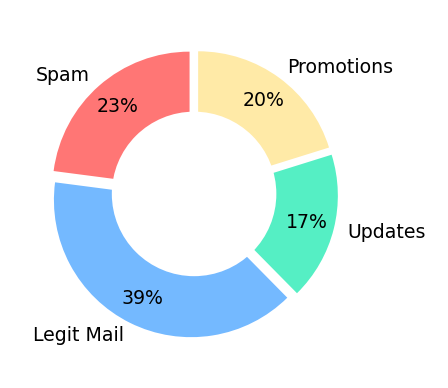

In [19]:
category_names = ['Spam', 'Legit Mail', 'Updates', 'Promotions']
sizes = [25, 43, 19, 22]
custom_colours = ['#ff7675', '#74b9ff', '#55efc4', '#ffeaa7']
offset = [0.05, 0.05, 0.05, 0.05]

plt.figure(figsize=(2, 2), dpi=227)
plt.pie(sizes, labels=category_names, textprops={'fontsize': 6}, startangle=90, 
       autopct='%1.0f%%', colors=custom_colours, pctdistance=0.8, explode=offset)

# draw circle
centre_circle = plt.Circle((0, 0), radius=0.6, fc='white')
plt.gca().add_artist(centre_circle)

plt.show()

# Natural Language Processing

### Text Pre-Processing

In [20]:
# convert to lower case
msg = 'All work and no play makes Jack a dull boy.'
msg.lower()

'all work and no play makes jack a dull boy.'

### Download the NLTK Resources (Tokenizer & Stopwords)

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JyotiSingh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JyotiSingh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
nltk.download('gutenberg')
nltk.download('shakespeare')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\JyotiSingh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\gutenberg.zip.
[nltk_data] Downloading package shakespeare to
[nltk_data]     C:\Users\JyotiSingh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\shakespeare.zip.


True

## Tokenising

In [24]:
msg = 'All work and no play makes Jack a dull boy.'
word_tokenize(msg.lower())

['all', 'work', 'and', 'no', 'play', 'makes', 'jack', 'a', 'dull', 'boy', '.']

## Removing Stop Words 

In [25]:
stop_words = set(stopwords.words('english'))

In [26]:
type(stop_words)

set

In [27]:
if 'this' in stop_words: print('Found it!')

Found it!


In [28]:
# Challenge: print out 'Nope. Not in here' if the word "hello" is not contained in stop_words

In [29]:
if 'hello' not in stop_words: print('Nope. Not in here')

Nope. Not in here


In [30]:
msg = 'All work and no play makes Jack a dull boy. To be or not to be.'
words = word_tokenize(msg.lower())

filtered_words = []
# Challenge: append non-stop words to filtered_words
for word in words:
    if word not in stop_words:
        filtered_words.append(word)

print(filtered_words)

['work', 'play', 'makes', 'jack', 'dull', 'boy', '.', '.']


## Word Stems and Stemming

In [31]:
msg = 'All work and no play makes Jack a dull boy. To be or not to be. \
      Nobody expects the Spanish Inquisition!'
words = word_tokenize(msg.lower())

# stemmer = PorterStemmer()
stemmer = SnowballStemmer('english')


filtered_words = []
# Challenge: append non-stop words to filtered_words
for word in words:
    if word not in stop_words:
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)

print(filtered_words)

['work', 'play', 'make', 'jack', 'dull', 'boy', '.', '.', 'nobodi', 'expect', 'spanish', 'inquisit', '!']


## Removing Punctuation

In [32]:
'p'.isalpha()

True

In [33]:
'?'.isalpha()

False

In [34]:
msg = 'All work and no play makes Jack a dull boy. To be or not to be. ??? \
      Nobody expects the Spanish Inquisition!'

words = word_tokenize(msg.lower())
stemmer = SnowballStemmer('english')
filtered_words = []

for word in words:
    if word not in stop_words and word.isalpha():
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)

print(filtered_words)

['work', 'play', 'make', 'jack', 'dull', 'boy', 'nobodi', 'expect', 'spanish', 'inquisit']


## Removing HTML tags from Emails

In [35]:
soup = BeautifulSoup(data.at[2, 'MESSAGE'], 'html.parser')
print(soup.prettify())

NameError: name 'data' is not defined

In [36]:
soup.get_text()

NameError: name 'soup' is not defined

## Functions for Email Processing

In [37]:
def clean_message(message, stemmer=PorterStemmer(), 
                 stop_words=set(stopwords.words('english'))):
    
    # Converts to Lower Case and splits up the words
    words = word_tokenize(message.lower())
    
    filtered_words = []
    
    for word in words:
        # Removes the stop words and punctuation
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
    
    return filtered_words

In [38]:
clean_message(email_body)

NameError: name 'email_body' is not defined

In [39]:
# Challenge: Modify function to remove HTML tags. Then test on Email with DOC_ID 2. 
def clean_msg_no_html(message, stemmer=PorterStemmer(), 
                 stop_words=set(stopwords.words('english'))):
    
    # Remove HTML tags
    soup = BeautifulSoup(message, 'html.parser')
    cleaned_text = soup.get_text()
    
    # Converts to Lower Case and splits up the words
    words = word_tokenize(cleaned_text.lower())
    
    filtered_words = []
    
    for word in words:
        # Removes the stop words and punctuation
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
#             filtered_words.append(word) 
    
    return filtered_words

In [40]:
clean_msg_no_html(data.at[2, 'MESSAGE'])

NameError: name 'data' is not defined

# Apply Cleaning and Tokenisation to all messages

### Slicing Dataframes and Series & Creating Subsets

In [41]:
data.iat[2, 2]

NameError: name 'data' is not defined

In [42]:
data.iloc[5:11]

NameError: name 'data' is not defined

In [43]:
first_emails = data.MESSAGE.iloc[0:3]

nested_list = first_emails.apply(clean_message)

NameError: name 'data' is not defined

In [44]:
# flat_list = []
# for sublist in nested_list:
#     for item in sublist:
#         flat_list.append(item)

flat_list = [item for sublist in nested_list for item in sublist]
        
len(flat_list)

NameError: name 'nested_list' is not defined

In [45]:
flat_list

NameError: name 'flat_list' is not defined

In [46]:
%%time

# use apply() on all the messages in the dataframe
nested_list = data.MESSAGE.apply(clean_msg_no_html)

NameError: name 'data' is not defined

In [47]:
nested_list.tail()

NameError: name 'nested_list' is not defined

### Using Logic to Slice Dataframes

In [48]:
data[data.CATEGORY == 1].shape

NameError: name 'data' is not defined

In [49]:
data[data.CATEGORY == 1].tail()

NameError: name 'data' is not defined

In [50]:
# Challenge: create two variables (doc_ids_spam, doc_ids_ham) which 
# hold onto the indices for the spam and the non-spam emails respectively. 

In [51]:
doc_ids_spam = data[data.CATEGORY == 1].index
doc_ids_ham = data[data.CATEGORY == 0].index

NameError: name 'data' is not defined

In [52]:
doc_ids_ham

NameError: name 'doc_ids_ham' is not defined

### Subsetting a Series with an Index

In [53]:
type(doc_ids_ham)

NameError: name 'doc_ids_ham' is not defined

In [54]:
type(nested_list)

NameError: name 'nested_list' is not defined

In [55]:
nested_list_ham = nested_list.loc[doc_ids_ham]

NameError: name 'nested_list' is not defined

In [56]:
nested_list_ham.shape

NameError: name 'nested_list_ham' is not defined

In [57]:
nested_list_ham.tail()

NameError: name 'nested_list_ham' is not defined

In [58]:
nested_list_spam = nested_list.loc[doc_ids_spam]

NameError: name 'nested_list' is not defined

In [59]:
# Challenge: use python list comprehension and then find the total number of 
# words in our cleaned dataset of spam email bodies. Also find the total number of 
# words in normal emails in the dataset. Then find the 10 most common words used in 
# spam. Also, find the 10 most common words used in non-spam messages. 

In [60]:
flat_list_ham = [item for sublist in nested_list_ham for item in sublist]
normal_words = pd.Series(flat_list_ham).value_counts()

normal_words.shape[0] # total number of unique words in the non-spam messages

NameError: name 'nested_list_ham' is not defined

In [61]:
normal_words[:10]

NameError: name 'normal_words' is not defined

In [62]:
flat_list_spam = [item for sublist in nested_list_spam for item in sublist]
spammy_words = pd.Series(flat_list_spam).value_counts()

spammy_words.shape[0] # total number of unique words in the spam messages

NameError: name 'nested_list_spam' is not defined

In [63]:
spammy_words[:10]

NameError: name 'spammy_words' is not defined

# Creating a Word Cloud

In [64]:
word_cloud = WordCloud().generate(email_body)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: name 'WordCloud' is not defined

In [65]:
example_corpus = nltk.corpus.gutenberg.words('melville-moby_dick.txt')
len(example_corpus)

260819

In [66]:
type(example_corpus)

nltk.corpus.reader.util.StreamBackedCorpusView

In [67]:
example_corpus

['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', ...]

In [68]:
word_list = [''.join(word) for word in example_corpus]
novel_as_string = ' '.join(word_list)

In [69]:
icon = Image.open(WHALE_FILE)
image_mask = Image.new(mode='RGB', size=icon.size, color=(255, 255, 255))
image_mask.paste(icon, box=icon)

rgb_array = np.array(image_mask) # converts the image object to an array

word_cloud = WordCloud(mask=rgb_array, background_color='white', 
                      max_words=400, colormap='ocean')

word_cloud.generate(novel_as_string)

plt.figure(figsize=[16, 8])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: name 'Image' is not defined

In [ ]:
rgb_array.shape

In [ ]:
rgb_array[1023, 2047]

In [ ]:
rgb_array[500, 1000]

In [ ]:
# Challenge: use the skull image in the lesson resources to create a word cloud
# for Shakespeare's play Hamlet

In [ ]:
hamlet_corpus = nltk.corpus.gutenberg.words('shakespeare-hamlet.txt')
word_list = [''.join(word) for word in hamlet_corpus]
hamlet_as_string = ' '.join(word_list)

skull_icon = Image.open(SKULL_FILE)
image_mask = Image.new(mode='RGB', size=skull_icon.size, color=(255, 255, 255))
image_mask.paste(skull_icon, box=skull_icon)
rgb_array = np.array(image_mask)

word_cloud = WordCloud(mask=rgb_array, background_color='white',
                      colormap='bone', max_words=600)

word_cloud.generate(hamlet_as_string)

plt.figure(figsize=[16, 8])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Word Cloud of Ham and Spam Messages

In [ ]:
icon = Image.open(THUMBS_UP_FILE)
image_mask = Image.new(mode='RGB', size=icon.size, color=(255, 255, 255))
image_mask.paste(icon, box=icon)

rgb_array = np.array(image_mask) # converts the image object to an array

# Generate the text as a string for the word cloud
ham_str = ' '.join(flat_list_ham)

word_cloud = WordCloud(mask=rgb_array, background_color='white', 
                      max_words=500, colormap='winter')

word_cloud.generate(ham_str)

plt.figure(figsize=[16, 8])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Challenge: Look at the word cloud documentation. Use the custom font included in the 
# lesson resources instead of the default font and create a word cloud of the spammy words

In [ ]:
icon = Image.open(THUMBS_DOWN_FILE)
image_mask = Image.new(mode='RGB', size=icon.size, color=(255, 255, 255))
image_mask.paste(icon, box=icon)

rgb_array = np.array(image_mask) # converts the image object to an array

# Generate the text as a string for the word cloud
spam_str = ' '.join(flat_list_spam)

word_cloud = WordCloud(mask=rgb_array, background_color='white', max_font_size=300,
                      max_words=2000, colormap='gist_heat', font_path=CUSTOM_FONT_FILE)

word_cloud.generate(spam_str.upper())

plt.figure(figsize=[16, 8])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Generate Vocabulary & Dictionary

In [ ]:
stemmed_nested_list = data.MESSAGE.apply(clean_msg_no_html)
flat_stemmed_list = [item for sublist in stemmed_nested_list for item in sublist]

In [70]:
unique_words = pd.Series(flat_stemmed_list).value_counts()
print('Nr of unique words', unique_words.shape[0])
unique_words.head()

NameError: name 'flat_stemmed_list' is not defined

In [71]:
# Challenge: Create subset of the series called 'frequent_words' that only contains
# the most common 2,500 words out of the total. Print out the top 10 words

In [72]:
frequent_words = unique_words[0:VOCAB_SIZE]
print('Most common words: \n', frequent_words[:10])

NameError: name 'unique_words' is not defined

## Create Vocabulary DataFrame with a WORD_ID

In [73]:
word_ids = list(range(0, VOCAB_SIZE))
vocab = pd.DataFrame({'VOCAB_WORD': frequent_words.index.values}, index=word_ids)
vocab.index.name = 'WORD_ID'
vocab.head()

NameError: name 'VOCAB_SIZE' is not defined

## Save the Vocabulary as a CSV File

In [74]:
vocab.to_csv(WORD_ID_FILE, index_label=vocab.index.name, header=vocab.VOCAB_WORD.name)

NameError: name 'vocab' is not defined

# Exercise: Checking if a Word is Part of the Vocabulary

In [75]:
# Challenge: Write a line of code that checks if a particular word is part 
# of the vocabulary. Your code should return True if the word is among the 
# 2,500 words that comprise the vocabulary, and False otherwise. Check these words:
# 'machine'
# 'learning'
# 'fun'
# 'learn'
# 'data'
# 'science'
# 'app'
# 'brewery'

In [76]:
any(vocab.VOCAB_WORD == 'machine') # inefficient

NameError: name 'vocab' is not defined

In [77]:
'brew' in set(vocab.VOCAB_WORD) # better way

NameError: name 'vocab' is not defined

# Exercise: Find the Email with the Most Number of Words

In [78]:
# Print out the number of words in the longest email (after cleaning & stemming).
# Note the longest email's position in the list of cleaned emails. Print out the stemmed
# list of words in the longest email. Print out the longest email from the data dataframe.

# Hint: use the len() function and practice list comprehension

In [79]:
# For loop
clean_email_lengths = []
for sublist in stemmed_nested_list:
    clean_email_lengths.append(len(sublist))

NameError: name 'stemmed_nested_list' is not defined

In [80]:
# Python List Comprehension
clean_email_lengths = [len(sublist) for sublist in stemmed_nested_list]
print('Nr words in the longest email:', max(clean_email_lengths))


NameError: name 'stemmed_nested_list' is not defined

In [81]:
print('Email position in the list (and the data dataframe)', np.argmax(clean_email_lengths))


NameError: name 'np' is not defined

In [82]:
stemmed_nested_list[np.argmax(clean_email_lengths)]

NameError: name 'stemmed_nested_list' is not defined

In [83]:
data.at[np.argmax(clean_email_lengths), 'MESSAGE']


NameError: name 'data' is not defined

# Generate Features & a Sparse Matrix

### Creating a DataFrame with one Word per Column

In [84]:
type(stemmed_nested_list)

NameError: name 'stemmed_nested_list' is not defined

In [85]:
type(stemmed_nested_list.tolist())

NameError: name 'stemmed_nested_list' is not defined

In [86]:
word_columns_df = pd.DataFrame.from_records(stemmed_nested_list.tolist())
word_columns_df.head()

NameError: name 'stemmed_nested_list' is not defined

In [87]:
word_columns_df.shape

NameError: name 'word_columns_df' is not defined

### Splitting the Data into a Training and Testing Dataset

In [88]:
# Challenge: Can you split the data into a training and testing set? Set the test size at 30%. 
# The training data should include 4057 emails. Use a seed value of 42 to shuffle the data. 
# What should the target values be? 

In [89]:
X_train, X_test, y_train, y_test = train_test_split(word_columns_df, data.CATEGORY,
                                                   test_size=0.3, random_state=42)

NameError: name 'train_test_split' is not defined

In [90]:
print('Nr of training samples', X_train.shape[0])
print('Fraction of training set', X_train.shape[0] / word_columns_df.shape[0])

NameError: name 'X_train' is not defined

In [91]:
X_train.index.name = X_test.index.name = 'DOC_ID'
X_train.head()

NameError: name 'X_train' is not defined

In [92]:
y_train.head()


NameError: name 'y_train' is not defined

### Create a Sparse Matrix for the Training Data

In [93]:
word_index = pd.Index(vocab.VOCAB_WORD)
type(word_index[3])

NameError: name 'vocab' is not defined

In [94]:
word_index.get_loc('thu')

NameError: name 'word_index' is not defined

In [95]:
def make_sparse_matrix(df, indexed_words, labels):
    """
    Returns sparse matrix as dataframe.
    
    df: A dataframe with words in the columns with a document id as an index (X_train or X_test)
    indexed_words: index of words ordered by word id
    labels: category as a series (y_train or y_test)
    """
    
    nr_rows = df.shape[0]
    nr_cols = df.shape[1]
    word_set = set(indexed_words)
    dict_list = []
    
    for i in range(nr_rows):
        for j in range(nr_cols):
            
            word = df.iat[i, j]
            if word in word_set:
                doc_id = df.index[i]
                word_id = indexed_words.get_loc(word)
                category = labels.at[doc_id]
                
                item = {'LABEL': category, 'DOC_ID': doc_id,
                       'OCCURENCE': 1, 'WORD_ID': word_id}
                
                dict_list.append(item)
    
    return pd.DataFrame(dict_list)

In [96]:
%%time
sparse_train_df = make_sparse_matrix(X_train, word_index, y_train)

NameError: name 'X_train' is not defined

In [97]:
sparse_train_df[:5]

NameError: name 'sparse_train_df' is not defined

In [98]:
sparse_train_df.shape

NameError: name 'sparse_train_df' is not defined

In [99]:
sparse_train_df[-5:]

NameError: name 'sparse_train_df' is not defined

### Combine Occurrences with the Pandas groupby() Method

In [100]:
train_grouped = sparse_train_df.groupby(['DOC_ID', 'WORD_ID', 'LABEL']).sum()
train_grouped.head()

NameError: name 'sparse_train_df' is not defined

In [101]:
vocab.at[0, 'VOCAB_WORD']

NameError: name 'vocab' is not defined

In [102]:
data.MESSAGE[0]

NameError: name 'data' is not defined

In [103]:
train_grouped = train_grouped.reset_index()
train_grouped.head()

NameError: name 'train_grouped' is not defined

In [104]:
train_grouped.tail()

NameError: name 'train_grouped' is not defined

In [105]:
vocab.at[1923, 'VOCAB_WORD']

NameError: name 'vocab' is not defined

In [106]:
data.MESSAGE[5795]

NameError: name 'data' is not defined

In [107]:
train_grouped.shape

NameError: name 'train_grouped' is not defined

### Save Training Data as .txt File

In [108]:
np.savetxt(TRAINING_DATA_FILE, train_grouped, fmt='%d')

NameError: name 'np' is not defined

In [109]:
train_grouped.columns

NameError: name 'train_grouped' is not defined

# Challenge

Can you create a sparse matrix for the test data. Group the occurrences of the same word in the same email. Then save the data as a .txt file. 

In [110]:
X_test.head()

NameError: name 'X_test' is not defined

In [111]:
y_test.head()

NameError: name 'y_test' is not defined

In [112]:
X_test.shape

NameError: name 'X_test' is not defined

In [113]:
%%time
sparse_test_df = make_sparse_matrix(X_test, word_index, y_test)

NameError: name 'X_test' is not defined

In [114]:
sparse_test_df.shape

NameError: name 'sparse_test_df' is not defined

In [115]:
test_grouped = sparse_test_df.groupby(['DOC_ID', 'WORD_ID', 'LABEL']).sum().reset_index()
test_grouped.head()

NameError: name 'sparse_test_df' is not defined

In [116]:
test_grouped.shape

NameError: name 'test_grouped' is not defined

In [ ]:

np.savetxt(TEST_DATA_FILE, test_grouped, fmt='%d')

# Pre-Processing Subtleties and Checking your Understanding

Challenge: We started with 5796 emails. We split it into 4057 emails for training and 1739 emails for testing. 

How many individual emails were included in the testing .txt file? Count the number in the test_grouped DataFrame. After splitting and shuffling our data, how many emails were included in the X_test DataFrame? Is the number the same? If not, which emails were excluded and why? Compare the DOC_ID values to find out.

In [ ]:
train_doc_ids = set(train_grouped.DOC_ID)
test_doc_ids = set(test_grouped.DOC_ID)

In [ ]:
len(test_doc_ids)

In [ ]:
len(X_test)

In [ ]:
set(X_test.index.values) - test_doc_ids # Excluded emails after pre-processing

In [ ]:
data.MESSAGE[14]

In [ ]:
data.loc[14]

In [ ]:
clean_msg_no_html(data.at[14, 'MESSAGE'])

In [ ]:
data.MESSAGE[1096]

In [ ]:
clean_msg_no_html(data.at[1096, 'MESSAGE'])

In [ ]:
clean_message(data.at[1096, 'MESSAGE'])

In [ ]:
sparse_train_df = make_sparse_matrix(X_train,word_index,y_train)